Terceiro projeto de Inteligência artificial

Alunos: Lucas Garavaglia, Milena Santos

Link: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

## imports necessários

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#### Carregamento do Dataset

In [275]:
init_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")
# dataset.info()
dataset = init_dataset.copy()

Identificação de outliers

#### Pré processamento

<AxesSubplot:xlabel='Age'>

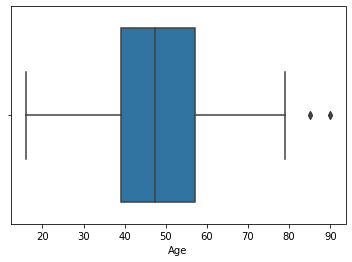

In [192]:
sns.boxplot(x=init_dataset['Age'])

Remoção de valores faltantes e dados duplicados.

In [283]:
dataset = dataset.dropna() #Fazendo uma observação do dataset foi notado que não 
                                #existem valores nulos, portanto esse método não esta fazendo nada.
                        
# dataset = dataset.drop_duplicates() 
#Após a remoção dos valores duplicados foi notado que a acurácia dos modelos cairam,
#plotando um gráfico de proporção foi notado também que os dados estão desbalanceados,
#portanto fio optado por não remover os duplicados a fim de manter o dataset balanceado.

indxs = []
for index,x in enumerate(dataset['Age']):
    if(x < 20 or x > 65):
        indxs.append(index)
        
dataset.drop(indxs,axis=0,inplace=True)

dataset.reset_index(inplace=True, drop=True)

In [226]:
def proportionDataset(dataset):
    target_count = dataset["class"].value_counts()
    t1 = str(round(target_count[1]*100/len(dataset),1)) + "%"
    t2 = str(round(target_count[0]*100/len(dataset),1)) + "%"
    print('Class 0:', target_count[0])
    print('Class 1:', target_count[1])
    print('Proporção:', round(target_count[1] / target_count[0], 2), ': 1')
    plt.bar([t1, t2], target_count,color = ['#1F77B4', '#FF7F0E'])
    # target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);


Class 0: 184
Class 1: 284
Proporção: 1.54 : 1


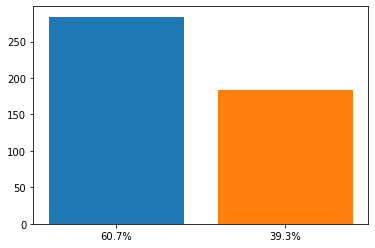

In [227]:
proportionDataset(dataset)
# proportionDataset(init_dataset)

#### Foi necessário a conversão dos dados para boolean poís a biblioteca não aceita tipo str

In [281]:
dataset['class'] = [1 if x == 'Positive' else 0 for x in dataset['class']]
dataset['Gender'] = [1 if x == 'Male' else 0 for x in dataset['Gender']]
dataset['Polyuria'] = [1 if x == 'Yes' else 0 for x in dataset['Polyuria']]
dataset['Polydipsia'] = [1 if x == 'Yes' else 0 for x in dataset['Polydipsia']]
dataset['weakness'] = [1 if x == 'Yes' else 0 for x in dataset['weakness']]
dataset['Polyphagia'] = [1 if x == 'Yes' else 0 for x in dataset['Polyphagia']]
dataset['Itching'] = [1 if x == 'Yes' else 0 for x in dataset['Itching']]
dataset['Irritability'] = [1 if x == 'Yes' else 0 for x in dataset['Irritability']]
dataset['Alopecia'] = [1 if x == 'Yes' else 0 for x in dataset['Alopecia']]
dataset['Obesity'] = [1 if x == 'Yes' else 0 for x in dataset['Obesity']]
dataset['delayed healing'] = [1 if x == 'Yes' else 0 for x in dataset['delayed healing']]
dataset['partial paresis'] = [1 if x == 'Yes' else 0 for x in dataset['partial paresis']]
dataset['muscle stiffness'] = [1 if x == 'Yes' else 0 for x in dataset['muscle stiffness']]
dataset['Genital thrush'] = [1 if x == 'Yes' else 0 for x in dataset['Genital thrush']]
dataset['visual blurring'] = [1 if x == 'Yes' else 0 for x in dataset['visual blurring']]
dataset['sudden weight loss'] = [1 if x == 'Yes' else 0 for x in dataset['sudden weight loss']]

cv_dataset = dataset.copy()

In [252]:
def confusionMatrix(y_test,y_pred):
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', cm)
    return cm

def showConfusionMatrix(y_test,y_pred):
    conf_mat = confusionMatrix(y_test,y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

In [266]:
def treeDecision(X_train, y_train):
    """
    Função que cria um árvore de decisão e retorna o modelo treinado.
    """
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

In [267]:
def RForestDecision(X_train,  y_train):
    """
    Função que cria um classificador Random Florest e retorna o modelo treinado.
    """
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [268]:
def KNN(X_train,  y_train):
    """
    Função que cria um classificador knn e retorna o modelo treinado.
    """
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    return model

Separação dos dados para treino e test

In [284]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["class"], axis=1), dataset["class"], test_size=0.3)

#### seleção de atributos

In [285]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
feature_selection = RFE(clf, step=1)
fs = feature_selection.fit(X_train, y_train)

attributes_selected = []
for index,i in enumerate(dataset.columns.drop(["class"])):
    if(fs.support_[index] == False):
        attributes_selected.append(i)

dataset_selected_attributes = dataset.drop(attributes_selected, axis=1).copy()

In [286]:
X_train_select_attr, X_test_select_attr, y_train_select_attr, y_test_select_attr = train_test_split(dataset_selected_attributes.drop(["class"], axis=1), dataset_selected_attributes["class"], test_size=0.3)
X_train_no_pre_pros, X_test_no_pre_pros, y_train_no_pre_pros, y_test_no_pre_pros = train_test_split(cv_dataset.drop(["class"], axis=1), cv_dataset["class"], test_size=0.3)

In [287]:
model_TD  = treeDecision(X_train, y_train)
model_RF  = RForestDecision(X_train, y_train)
model_KNN = KNN(X_train, y_train)

In [288]:
model_TD_select_attr  = treeDecision(X_train_select_attr, y_train_select_attr)
model_RF_select_attr  = RForestDecision(X_train_select_attr, y_train_select_attr)
model_KNN_select_attr = KNN(X_train_select_attr, y_train_select_attr)

In [289]:
model_TD_no_pre_pros  = treeDecision(X_train_no_pre_pros, y_train_no_pre_pros)
model_RF_no_pre_pros  = RForestDecision(X_train_no_pre_pros, y_train_no_pre_pros)
model_KNN_no_pre_pros = KNN(X_train_no_pre_pros, y_train_no_pre_pros)

In [324]:
TD_acc_select_attr = cross_val_score(model_TD_select_attr, X_test_select_attr, y_test_select_attr, cv=10,scoring="f1")
TD_acc = cross_val_score(model_TD, X_test, y_test, cv=10,scoring="f1")
TD_acc_no_pre_pros = cross_val_score(model_TD_no_pre_pros, X_test_no_pre_pros, y_test_no_pre_pros, cv=10,scoring="f1")

print("Média de acurácia: {}, desvio padrão : {}".format(TD_acc_select_attr.mean(),np.std(TD_acc_select_attr)))
print("Média de acurácia: {}, desvio padrão : {}".format(TD_acc.mean(),np.std(TD_acc)))
print("Média de acurácia: {}, desvio padrão : {}".format(TD_acc_no_pre_pros.mean(),np.std(TD_acc_no_pre_pros)))

Média de acurácia: 0.9563054695562435, desvio padrão : 0.028941589794240316
Média de acurácia: 0.9150326797385622, desvio padrão : 0.06280770297225247
Média de acurácia: 0.9475, desvio padrão : 0.10179295435124947


In [323]:
RF_acc_select_attr = cross_val_score(model_RF_select_attr, X_test_select_attr, y_test_select_attr, cv=10,scoring="f1")
RF_acc = cross_val_score(model_RF, X_test, y_test, cv=10,scoring="f1")
RF_acc_no_pre_pros = cross_val_score(model_RF_no_pre_pros, X_test_no_pre_pros, y_test_no_pre_pros, cv=10,scoring="f1")

print("Média de acurácia: {}, desvio padrão : {}".format(RF_acc_select_attr.mean(),np.std(RF_acc_select_attr)))
print("Média de acurácia: {}, desvio padrão : {}".format(RF_acc.mean(),np.std(RF_acc)))
print("Média de acurácia: {}, desvio padrão : {}".format(RF_acc_no_pre_pros.mean(),np.std(RF_acc_no_pre_pros)))

Média de acurácia: 0.9755211558307535, desvio padrão : 0.030210993835384
Média de acurácia: 0.9696878224974201, desvio padrão : 0.0413659934123612
Média de acurácia: 0.9477073906485671, desvio padrão : 0.0694682405444045


In [322]:
knn_acc_select_attr = cross_val_score(model_KNN_select_attr, X_test_select_attr, y_test_select_attr, cv=10,scoring="f1")
knn_acc = cross_val_score(model_KNN, X_test, y_test, cv=10,scoring="f1")
knn_acc_no_pre_pros = cross_val_score(model_KNN_no_pre_pros, X_test_no_pre_pros, y_test_no_pre_pros, cv=10,scoring="f1")

print("Média de acurácia: {}, desvio padrão : {}".format(knn_acc_select_attr.mean(),np.std(knn_acc_select_attr)))
print("Média de acurácia: {}, desvio padrão : {}".format(knn_acc.mean(),np.std(knn_acc)))
print("Média de acurácia: {}, desvio padrão : {}".format(knn_acc_no_pre_pros.mean(),np.std(knn_acc_no_pre_pros)))

Média de acurácia: 0.945359477124183, desvio padrão : 0.031086935188402207
Média de acurácia: 0.8774953314659196, desvio padrão : 0.09292825998136064
Média de acurácia: 0.7800488400488401, desvio padrão : 0.12538616288026508
